__Introduction__

The objective of this project is to examine the effects of user engagement after seeing Ad A or Ad B

 

__Problem__

An advertising company has developed a new ad to have users engage with their questionnaire. The company has shown the new ad to some users and a dummy ad to others and wants their data analyst team to interpret the results. Does the new ad generate more responses to their questionnaire? Is it statistically significant? Is the company justified in using the new ad? 


__Data__

Dataset is found on kaggle from an advertising company. https://www.kaggle.com/osuolaleemmanuel/ad-ab-testing



__Columns Description__

auction_id: the unique id of the online user who has been presented the BIO. In standard terminologies this is called an impression id. The user may see the BIO questionnaire but choose not to respond. In that case both the yes and no columns are zero.

experiment: which group the user belongs to - control or exposed.

control: users who have been shown a dummy ad

exposed: users who have been shown a creative, an online interactive ad, with the SmartAd brand.

date: the date in YYYY-MM-DD format

hour: the hour of the day in HH format.

device_make: the name of the type of device the user has e.g. Samsung

platform_os: the id of the OS the user has.

browser: the name of the browser the user uses to see the BIO questionnaire.

yes: 1 if the user chooses the “Yes” radio button for the BIO questionnaire.

no: 1 if the user chooses the “No” radio button for the BIO questionnaire.

__Experiment Approach__

__Null Hypothesis__ Hₒ: p = pₒ "There is no significant difference between the ad success rate of both groups"

__Alternative Hypothesis__ Hₐ: p ≠ pₒ "There is significant difference between the ad success rate of both groups"

__Confidence Level__: 95% (α=0.05)

*_we will perform a two-tailed test_

__Package & Data Imports__

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import binom
import seaborn as sns

In [2]:
AdSmart=pd.read_csv("AdSmartABdata - AdSmartABdata.csv")
AdSmart

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [3]:
AdSmart.tail(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
8067,ffc594ef-756c-4d24-a310-0d8eb4e11eb7,exposed,2020-07-05,1,Samsung SM-G950F,6,Chrome Mobile WebView,0,0
8068,ffc860d9-dece-4e24-92b2-3379fe7dc73d,control,2020-07-10,8,Samsung SM-A520F,6,Samsung Internet,0,0
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1
8070,ffcea781-a6e7-4f98-9d90-f95377270476,control,2020-07-03,15,Samsung SM-N976B,6,Facebook,0,0
8071,ffdfdc09-48c7-4bfb-80f8-ec1eb633602b,exposed,2020-07-03,4,Generic Smartphone,6,Chrome Mobile,0,1
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0
8076,fffbb9ff-568a-41a5-a0c3-6866592f80d8,control,2020-07-10,14,Samsung SM-G960F,6,Facebook,0,0


In [4]:
AdSmart.shape

(8077, 9)

In [5]:
AdSmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


__Data Preprocessing__

__Check for null values__

In [6]:
AdSmart.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

_*there is no null values_

__Check non-answer observations__ (both 'yes' and 'no' columns are equal to 0)

In [7]:
AdSmart_NoAns = AdSmart[(AdSmart['yes'] == 0) & (AdSmart['no'] == 0)]
AdSmart_NoAns

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


_*we will drop 6834 observations_

__Drop non-answer observations and assign to another variable__

In [8]:
AdSmart_AfterNoAns= AdSmart.drop(AdSmart_NoAns.index)

In [10]:
AdSmart_AfterNoAns.shape

(1243, 9)

_*only left with 1243 observations_

In [11]:
AdSmart_AfterNoAns.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1


__Exploratory Data Analysis__

In [12]:
Exper= AdSmart_AfterNoAns.groupby(['experiment']).sum()
Exper

,hour,platform_os,yes,no
experiment,,,,
control,7282,3503,264,322
exposed,7038,3938,308,349


In [13]:
AdSmart_AfterNoAns['experiment'].value_counts()

exposed    657
control    586
Name: experiment, dtype: int64

In [14]:
Num_con= AdSmart_AfterNoAns.experiment.value_counts().control
Num_con

586

In [15]:
Num_exp= AdSmart_AfterNoAns.experiment.value_counts().exposed
Num_exp

657

In [16]:
Exper_YesNo= AdSmart_AfterNoAns.groupby('experiment')['yes','no'].sum()
Exper_YesNo

C:\Users\TT Z580\AppData\Local\Temp\ipykernel_24196\587089310.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Exper_YesNo= AdSmart_AfterNoAns.groupby('experiment')['yes','no'].sum()


,yes,no
experiment,,
control,264,322
exposed,308,349


In [17]:
Exper_Yes= AdSmart_AfterNoAns.groupby('experiment')['yes'].sum()
Exper_Yes

experiment
control    264
exposed    308
Name: yes, dtype: int64

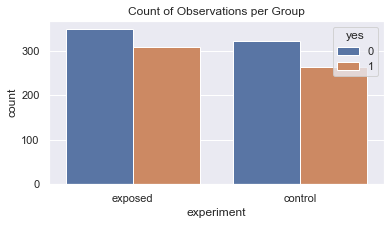

In [18]:
sns.set(rc={'figure.figsize':(6,3)})
sns.countplot(x='experiment', hue='yes', data=AdSmart_AfterNoAns)
plt.title('Count of Observations per Group')
plt.show()
plt.close()

In [19]:
Con_Yes=Exper_Yes.iloc[0]
Exp_Yes=Exper_Yes.iloc[1]

In [20]:
rate_con, rate_exp = Con_Yes/Num_con, Exp_Yes/Num_exp
print(rate_con)
print(rate_exp)

0.45051194539249145
0.4687975646879756


_Ad Success Control group 45.05%_

_Ad Success Exposed group 46.88%_

___Ad success is higher on the exposed group by 4%___


__Statistical Significance__

<BarContainer object of 200 artists>

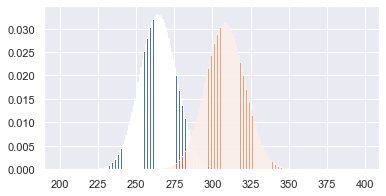

In [21]:
clicks = np.arange(200,400)

prob_a = binom(Num_con, rate_con).pmf(clicks)#probability mass function
prob_b = binom(Num_exp, rate_exp).pmf(clicks)

plt.bar(clicks, prob_a, label='A', alpha=1) 
plt.bar(clicks, prob_b, label='B', alpha=0.7)

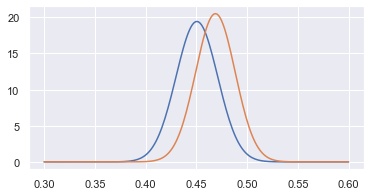

In [22]:
from scipy.stats import norm

std_a=np.sqrt(rate_con * (1-rate_con)/Num_con)
std_b=np.sqrt(rate_exp * (1-rate_exp)/Num_exp)

click_rateN = np.linspace(0.30,0.60, 200)
prob_aN = norm(rate_con, std_a).pdf(click_rateN) #The probability density function
prob_bN = norm(rate_exp, std_b).pdf(click_rateN)

plt.plot(click_rateN, prob_aN, label='A')
plt.plot(click_rateN, prob_bN, label='B')

In [23]:
z_score = (rate_exp-rate_con)/np.sqrt(std_a**2+std_b**2)
z_score

0.6458981015684259

In [24]:
p= 1-norm().cdf(z_score)
p

0.2591726745827285

In [25]:
#method2 for p
p2 = norm().sf(z_score)
p2

0.2591726745827285

__Conclusion__

p=0.2591726745827285

p>0.05, we can not reject the null hypothesis and conclude that there is no statistically significant difference between the AdA and AdB

These findings indicate that the new ad will yield no extra benefit.

In [ ]:
#simulation

n = 100000

rates_con = norm(rate_con, std_a).rvs(n)
rates_exp = norm(rate_exp, std_b).rvs(n)

exp_better = (rates_exp>rates_con).mean()

print(exp_better)
print(1-exp_better)

In [ ]:
(rates_exp>rates_con).mean()